# Using support vector machines for classification tasks

In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as ms
import sklearn.svm as svm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.random.randn(200, 2)
y = X[:, 0] + X[:, 1] > 1

In [8]:
# We train the classifier.
est = svm.LinearSVC()
est.fit(X, y)

LinearSVC()

In [9]:
# We generate a grid in the square [-3,3 ]^2.
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))

# This function takes a SVM estimator as input.


def plot_decision_function(est, title):
    # We evaluate the decision function on the grid.
    Z = est.decision_function(np.c_[xx.ravel(),
                                    yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap = plt.cm.Blues

    # We display the decision function on the grid.
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.imshow(Z,
              extent=(xx.min(), xx.max(),
                      yy.min(), yy.max()),
              aspect='auto',
              origin='lower',
              cmap=cmap)

    # We display the boundaries.
    ax.contour(xx, yy, Z, levels=[0],
               linewidths=2,
               colors='k')

    # We display the points with their true labels.
    ax.scatter(X[:, 0], X[:, 1],
               s=50, c=.5 + .5 * y,
               edgecolors='k',
               lw=1, cmap=cmap,
               vmin=0, vmax=1)
    ax.axhline(0, color='k', ls='--')
    ax.axvline(0, color='k', ls='--')
    ax.axis([-3, 3, -3, 3])
    ax.set_axis_off()
    ax.set_title(title)

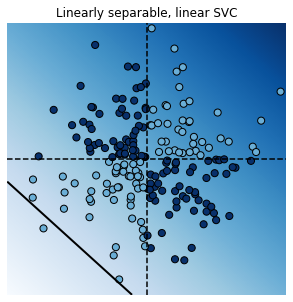

In [10]:
ax = plot_decision_function(
    est, "Linearly separable, linear SVC")

C:\tools\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\tools\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\tools\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\tools\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\tools\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\tools\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iteratio

Score: 0.4


C:\tools\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\tools\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\tools\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\tools\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\tools\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\tools\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iteratio

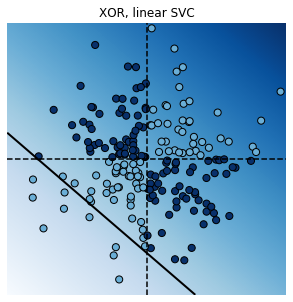

In [6]:
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# We train the classifier.
est = ms.GridSearchCV(svm.LinearSVC(),
                      {'C': np.logspace(-3., 3., 10)}, cv = 3)
est.fit(X, y)
print("Score: {0:.1f}".format(
      ms.cross_val_score(est, X, y, cv = 3).mean()))

# We plot the decision function.
ax = plot_decision_function(
    est, "XOR, linear SVC")

Score: 0.950


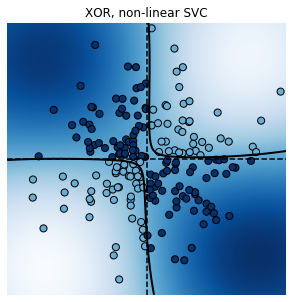

In [7]:
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

est = ms.GridSearchCV(
    svm.SVC(), {'C': np.logspace(-3., 3., 10),
                'gamma': np.logspace(-3., 3., 10)}, cv = 5)
est.fit(X, y)
print("Score: {0:.3f}".format(
      ms.cross_val_score(est, X, y,  cv = 5).mean()))

plot_decision_function(
    est.best_estimator_, "XOR, non-linear SVC")

In [11]:
est = svm.SVC()
est.fit(X, y)

SVC()

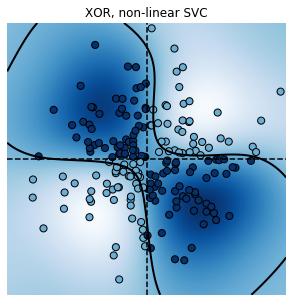

In [12]:
plot_decision_function(
   est, "XOR, non-linear SVC")